In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
import numpy as np

from scipy.signal import savgol_filter

from lint.models import Token

def savgol_series(token, window=15, order=2, corpus=None):
    
    # Get the raw token series.
    series = Token.token_series(token, corpus)
    
    # Total token count.
    total_count = sum(series.values())
    
    # By default, 0s in all bins.
    f_obs = np.zeros(100)
    
    # Fill the array with the observed values.
    for offset, count in series.items():
        f_obs[offset] = count/total_count
        
    return savgol_filter(f_obs, window, order)

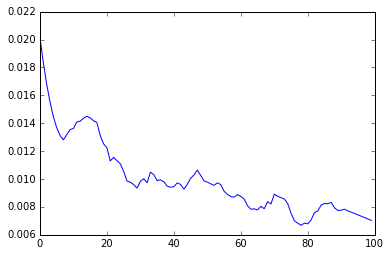

In [3]:
plt.plot(savgol_series('oxford', corpus='gail'))
plt.show()

In [4]:
from joblib import Memory

mem = Memory('cache')

token_counts = mem.cache(Token.token_counts)

tokens = token_counts(20000)

In [5]:
from collections import OrderedDict

data = []
for token in tokens:
    data.append((token, savgol_series(token)[25]))

In [6]:
import pandas as pd

df = pd.DataFrame(data, columns=('token', 'density'))

df.sort_values('density', ascending=False, inplace=True)

In [7]:
def plot_token_series(token, figsize=(5,2)):
    
    gail = Token.token_series(token, corpus='gail')
    chicago = Token.token_series(token, corpus='chicago')
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    plt.title('Offset-binned token counts')
    plt.tight_layout(w_pad=3)

    ax1.set_title('Gail')
    ax1.plot(*zip(*gail.items()))

    ax2.set_title('Chicago')
    ax2.plot(*zip(*chicago.items()))

    print(token)
    plt.show()

vi


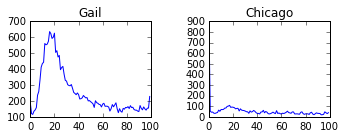

x


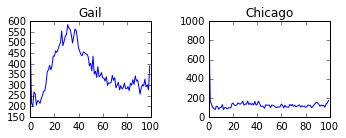

lessons


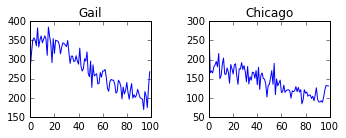

pig


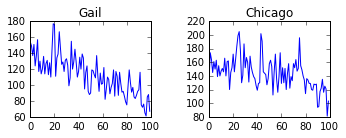

compliment


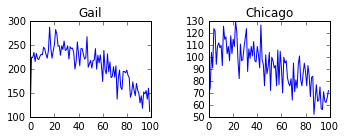

pie


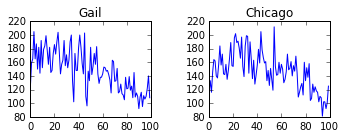

beans


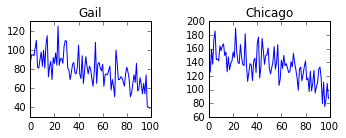

teachers


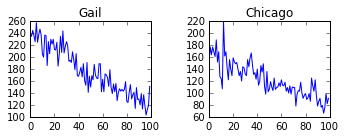

flattered


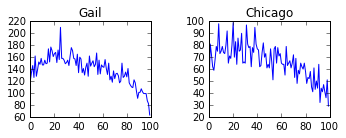

wade


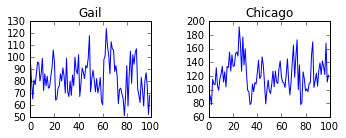

students


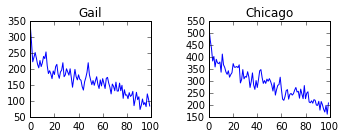

teacher


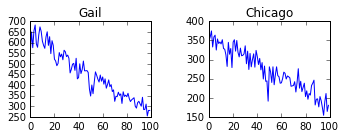

butter


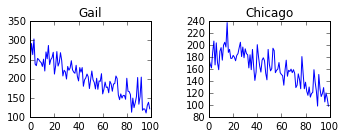

leonard


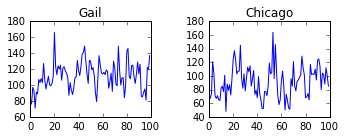

dennis


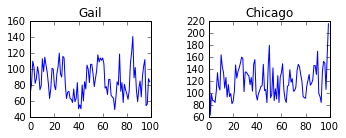

cups


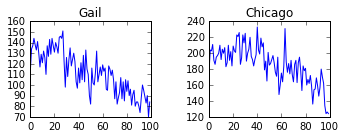

julie


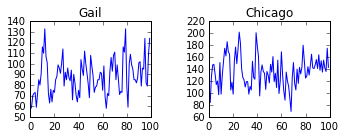

vulgar


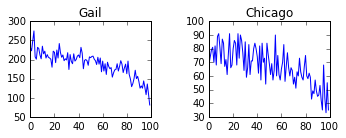

sermon


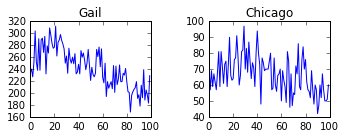

potatoes


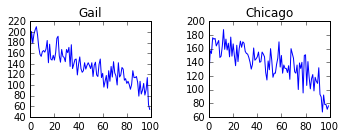

sleeves


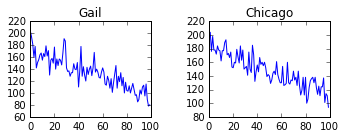

shelves


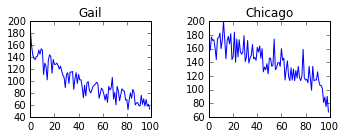

introduce


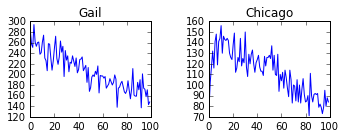

avere


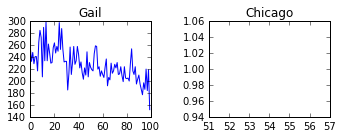

luncheon


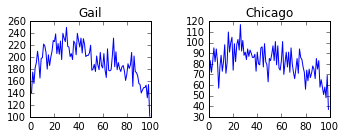

jewelry


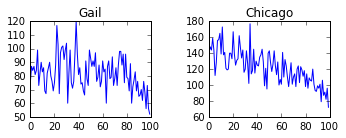

tobacco


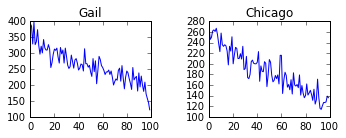

fork


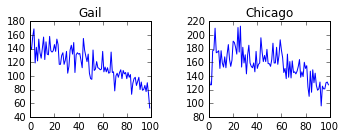

piano


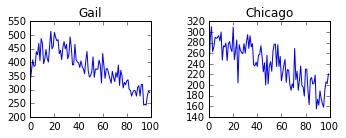

waiter


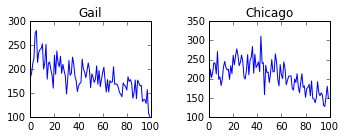

maam


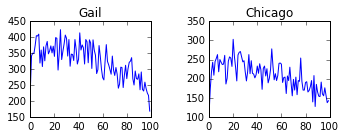

cream


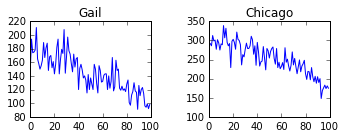

harvey


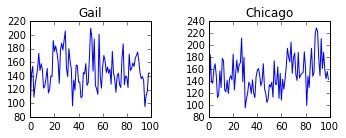

pauline


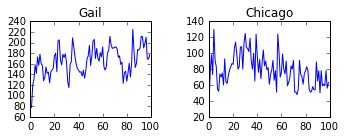

agreeable


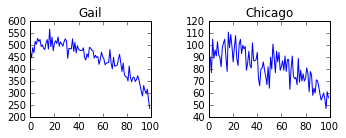

junior


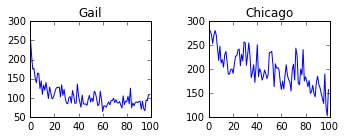

buttons


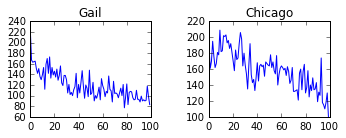

charming


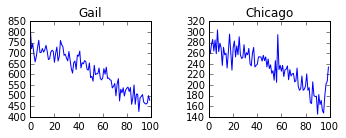

embarrassment


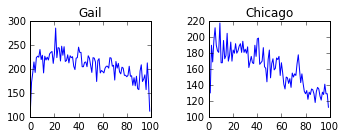

bucket


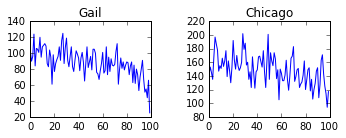

school


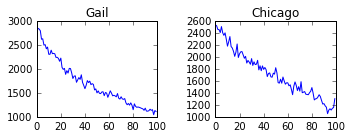

cigars


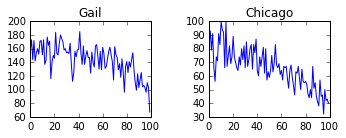

singer


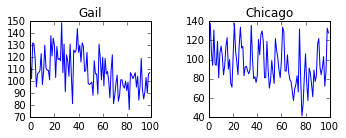

amused


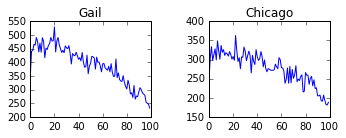

cheese


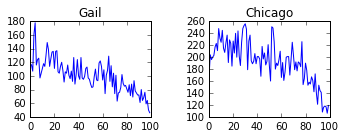

norman


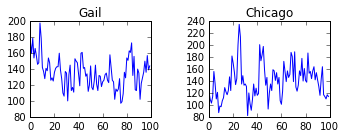

apples


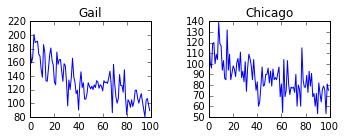

pupils


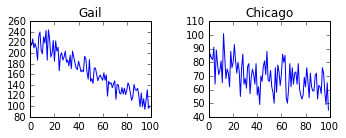

introduction


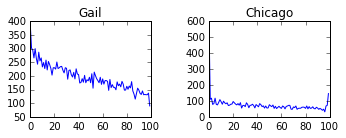

artists


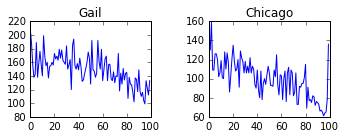

latin


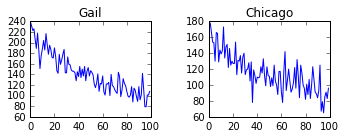

acquaintances


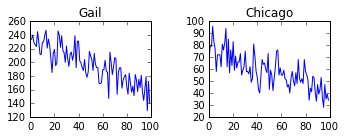

good-night


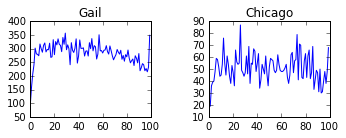

annoyed


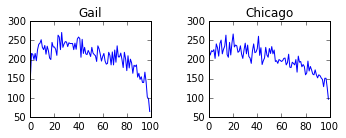

arts


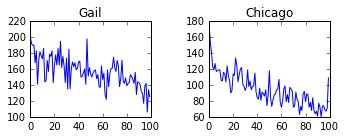

bonnet


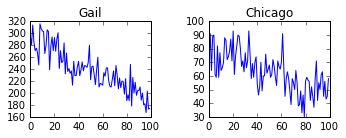

faculty


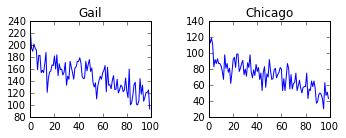

poetry


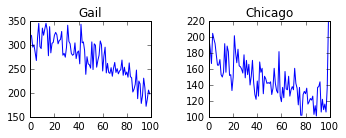

amuse


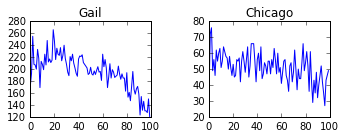

class


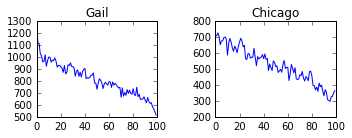

manners


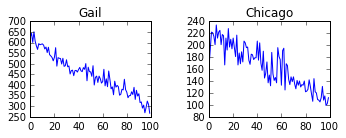

lunch


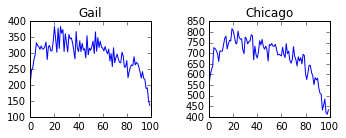

drinks


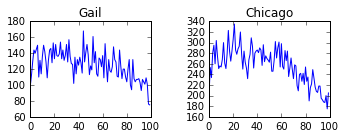

painter


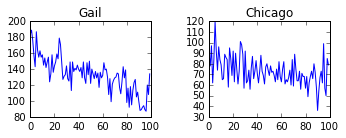

sport


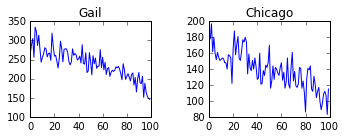

taller


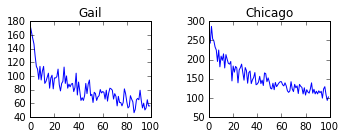

eggs


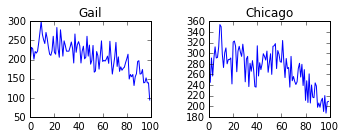

pleasantly


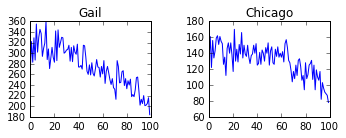

amusement


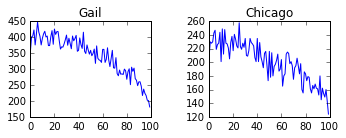

paint


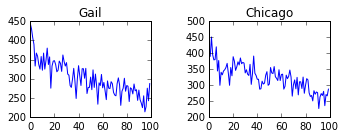

cows


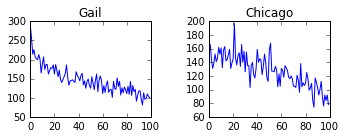

cook


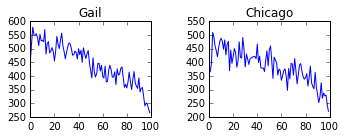

emily


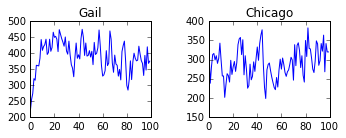

pop


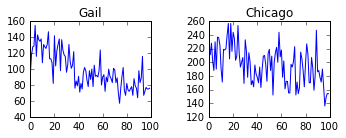

politely


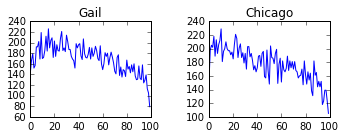

pious


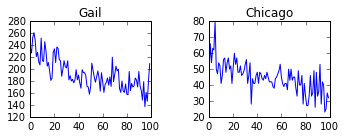

prudence


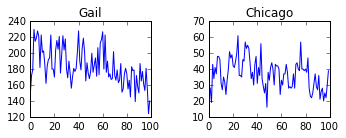

julian


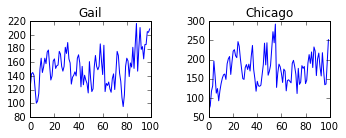

apt


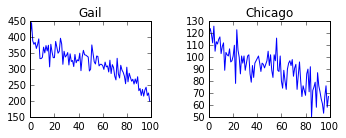

jolly


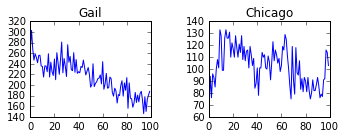

pleasing


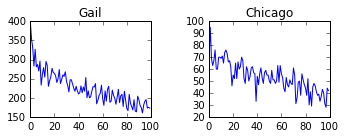

customers


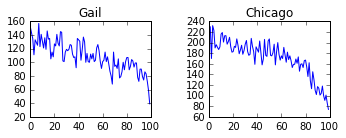

jefferson


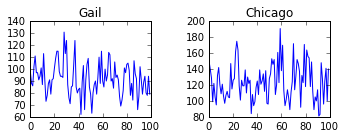

intimacy


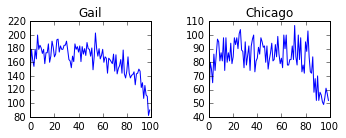

liked


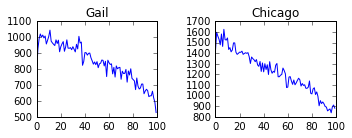

forbidden


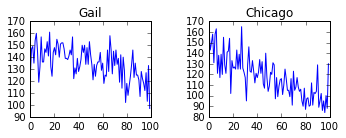

admiring


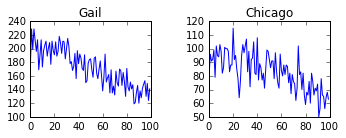

attractive


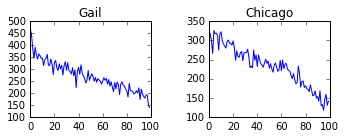

bored


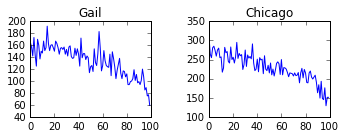

uncomfortable


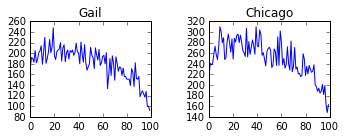

mamma


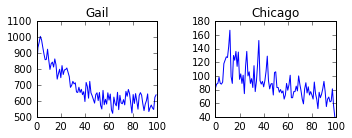

beef


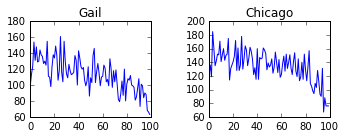

fish


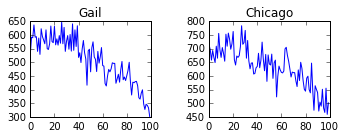

elder


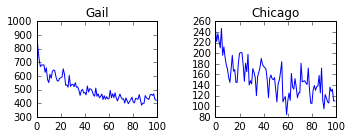

andy


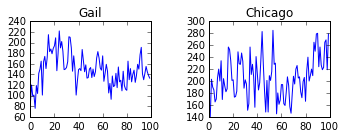

feller


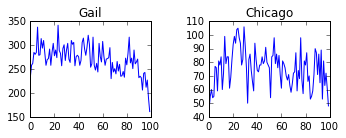

dish


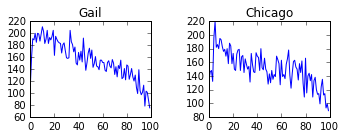

poets


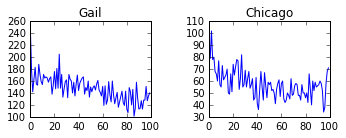

collection


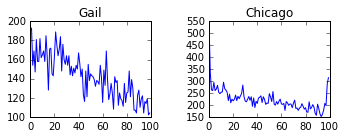

liking


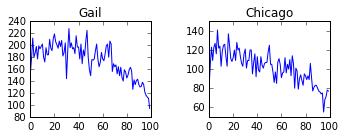

In [10]:
for i, (token, mid) in df.head(100).iterrows():
    plot_token_series(token)

In [88]:
def plot_token_series(token, figsize=(5,2)):
    
    gail = Token.token_series(token, corpus='gail')
    chicago = Token.token_series(token, corpus='chicago')
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    plt.title('Offset-binned token counts')
    plt.tight_layout(w_pad=3)

    ax1.set_title('Gail')
    ax1.plot(*zip(*gail.items()))

    ax2.set_title('Chicago')
    ax2.plot(*zip(*chicago.items()))

    print(token)
    plt.show()

ford


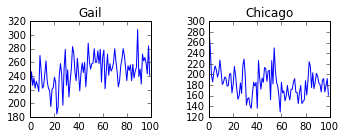

In [89]:
plot_token_series('ford')